# EFFECTIVENESS OF TEST PREPARATION COURSE







### Group:

__Sara Osama Kilany__

__Rashidat Sikiru__




# Introduction
### Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams. Since you have recently learned data manipulation and plotting, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores.

### The Data
The dataset was downloaded from <a href="https://https://app.datacamp.com/learn/competitions/student-exam-scores?activeTab=competition-entries">datacamp</a>. The data contains 1000 entries with the following features:
*   "gender" - either male or female
*   "race/ethnicity" - one of 5 combinations of race/ethnicity(group A to E)
*   "parent_education_level" - highest level of education of either parent
*   "lunch" - if the student receives free/reduced or standard lunch
*   "test_prep_course" - if the student took the test preparation course
*   "math" - exam score in math for each student
*   "reading" - exam score in reading for each student
*   "writing" - exam score in writing for each student

### Data Camp's Problem Statement

The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores.

### Required Questions
Create a report to answer the principal's questions. Include:

What are the average reading scores for students with/without the test preparation course?

What are the average scores for the different parental education levels?

Create plots to visualize findings for questions 1 and 2.

[Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

[Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.
\
Summarize your findings.










In [ ]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
sns.set()
import warnings
warnings.filterwarnings('ignore')

# WARNING
Please upload the dataset from here and name it 'education_project' please.
[link text](https://drive.google.com/drive/folders/1z5ZIg9L1MegvUX53N-oDb9ezDDZ7K9-W?usp=share_link)

In [ ]:
df = pd.read_csv("education_project.csv")
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# summary of our dataset
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:

# checking duplicates
df.duplicated().sum()

0

In [ ]:
#unique values of the categorical variables
dict_unique={col:df[col].unique() for col in df.columns[:-3]}
dict_unique

{'gender': array(['female', 'male'], dtype=object),
 'race/ethnicity': array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 'parent_education_level': array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 'lunch': array(['standard', 'free/reduced'], dtype=object),
 'test_prep_course': array(['none', 'completed'], dtype=object)}

__Data set is clean__

After reviewing the data types, unique values and nulls, we concluded that the data set is clean and ready for further preparation to the analysis


# Univariate Analysis

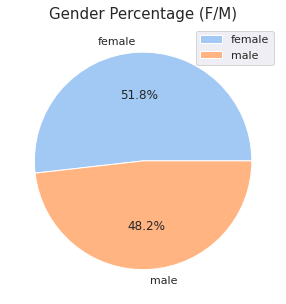

,gender
female,0.518
male,0.482


In [ ]:
palette_color = sns.color_palette('pastel')
df.gender.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(5,5), colors=palette_color)
plt.title('Gender Percentage (F/M)',fontsize=15)
plt.legend() #### change legend position
plt.ylabel("",fontsize=15)
plt.show()
df.gender.value_counts(normalize=True).to_frame()


__The data is  almost equally balanced__ in terms of gender. We will assume that the slight difference in the percentages will not affect our analysis 

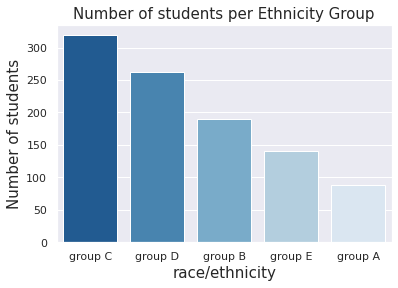

In [ ]:
# plotting the number of students in each ethnicity group
sns.countplot(data =df,x="race/ethnicity",order=df["race/ethnicity"].value_counts().index, palette ="Blues_r")
plt.title('Number of students per Ethnicity Group',fontsize=15)
plt.ylabel('Number of students',fontsize=15)
plt.xlabel("race/ethnicity",fontsize=15)
plt.show()

In [ ]:
df["race/ethnicity"].value_counts(normalize =True).to_frame()

,race/ethnicity
group C,0.319
group D,0.262
group B,0.190
group E,0.140
group A,0.089


From the count plot, we found that __group A__ represents the smallest ethnical minority of of ~ __9%__ while __group C__ represents the largest ethnic group of ~ __32%__

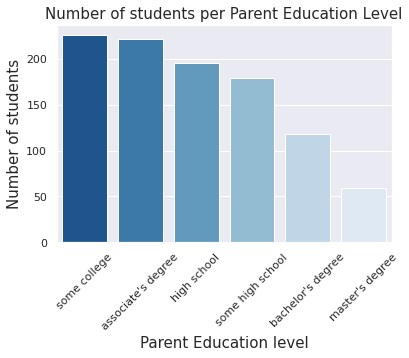

In [ ]:
#  Number of students for each group of parent education level

sns.countplot(data =df, x="parent_education_level",order=df["parent_education_level"].value_counts().index, palette ="Blues_r" )
plt.xticks(rotation =45)
plt.title('Number of students per Parent Education Level',fontsize=15)
plt.ylabel('Number of students',fontsize=15)
plt.xlabel("Parent Education level",fontsize=15)
plt.show()

In [ ]:
(df["parent_education_level"].value_counts(normalize=True)*100).to_frame()

,parent_education_level
some college,22.6
associate's degree,22.2
high school,19.6
some high school,17.9
bachelor's degree,11.8
master's degree,5.9


From the count plot, we found that __parents with Masters degree__ are the smallest group of __~6%__, __parents with associate degree__ represent the second largest group __~%22__ while __parents with some college__ represent the largest group __~23%__

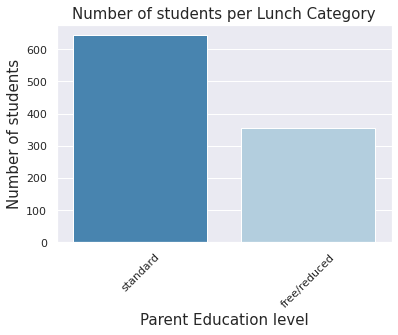

In [ ]:

sns.countplot(data =df, x="lunch",palette="Blues_r" )
plt.xticks(rotation =45)
plt.title('Number of students per Lunch Category',fontsize=15)
plt.ylabel('Number of students',fontsize=15)
plt.xlabel("Parent Education level",fontsize=15)
plt.show()

In [ ]:
(df["lunch"].value_counts(normalize=True)*100).to_frame()

,lunch
standard,64.5
free/reduced,35.5


__~65%__ of students subscribed to standard lunch while

__~35%__ of students are beneficiaries of free or reduced lunch

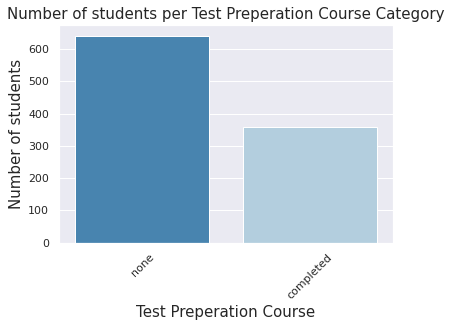

In [ ]:
sns.countplot(data =df, x="test_prep_course",palette="Blues_r" )
plt.xticks(rotation =45)
plt.title('Number of students per Test Preperation Course Category',fontsize=15)
plt.ylabel('Number of students',fontsize=15)
plt.xlabel("Test Preperation Course",fontsize=15)
plt.show()

In [ ]:
(df["test_prep_course"].value_counts(normalize=True)*100).to_frame()

,test_prep_course
none,64.2
completed,35.8


__~64%__ of students __did not take the test preparation course__ while __~36%__ of students __completed the test preparation course__

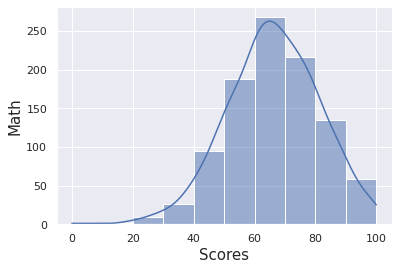

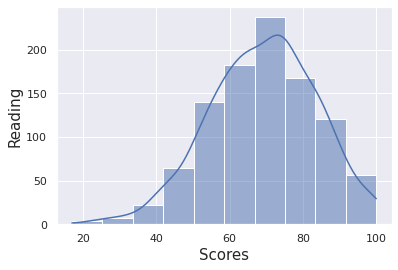

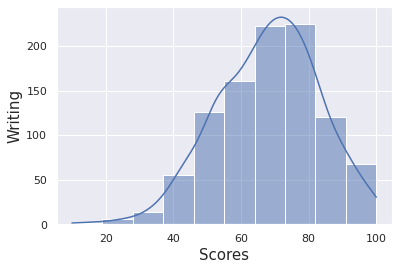

In [ ]:
for col in df.columns[-3:]:
    sns.histplot(df[col], kde=True, bins=10)
    
    plt.ylabel(col.title(),fontsize=15)
    plt.xlabel("Scores",fontsize=15)
    plt.show()
    

Maths is left-skewed and it's closest to the shape of a normal distribution while writing is showing a bimodal distribution, the two modes are adjacent to each other.

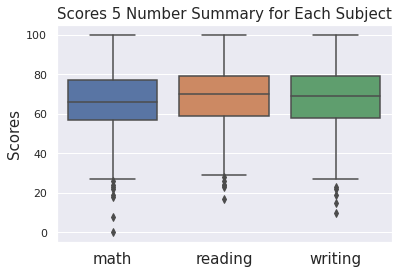

In [ ]:
# exploring the numerical features of the data set using box plot
sns.boxplot(data=df)
plt.title('Scores 5 Number Summary for Each Subject',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.xticks(fontsize=15)
plt.show()

The box plot alongside the summary of our dataset showed that maths has the lowest inter-quartile parameters (Q1,Q3 and median) as well as a minimum score 0 and reading has the higest score in everything.

In [ ]:
q4 = df.corr()
q4

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


Scores are higly correlated. The most correlated scores are reading and writing with pearson coefficient of .95

# Multi-Variate Analysis

In [ ]:
# function to plot pair plots of a certain category
def Plot_pair_plot(col):
    # plt.figure(figsize=(10,10))
    g = sns.pairplot(df,hue=col)
    g.fig.suptitle(f'Pair Plot of Subjects Scores for Each {col.title()}',fontsize=15, y=1.05)
    # sns.pairplot(df, )
    # plt.title(f'Pair Plot of Subjects Scores for Each {col.title()}',fontsize=15,)
    # plt.ylabel('Scores',fontsize=15)
    # plt.xlabel("Subject",fontsize=15)
    plt.show()

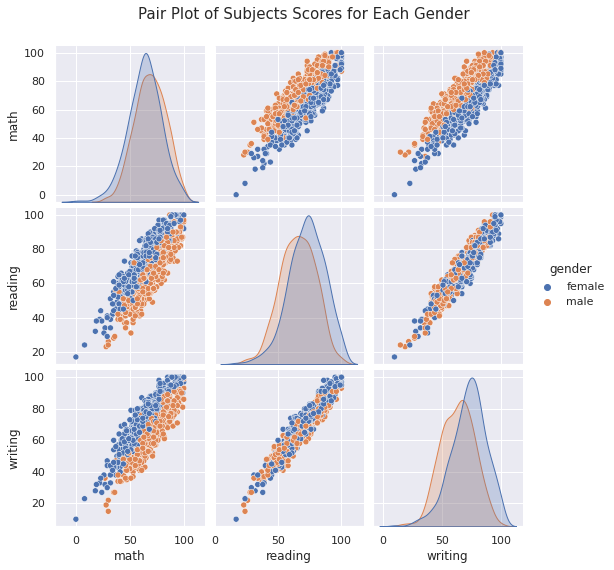

In [ ]:
Plot_pair_plot("gender")

Within each groups, a larger number of female gets the median score more than males do.

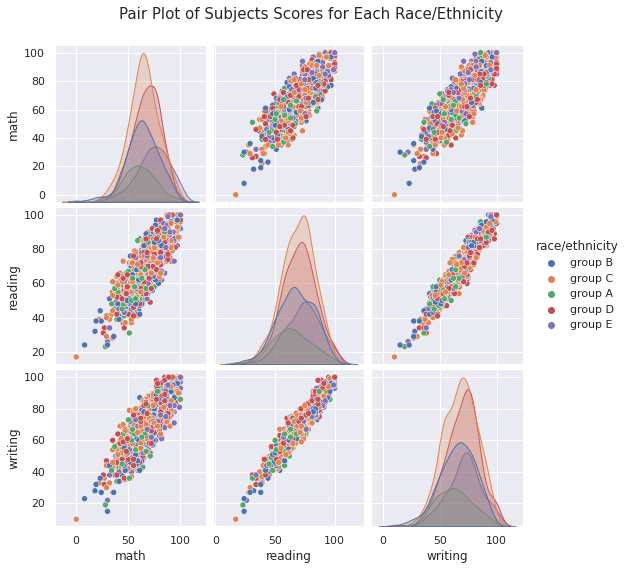

In [ ]:
Plot_pair_plot("race/ethnicity")

The race/ethnicity will be further explored using the box plot or other grouping method

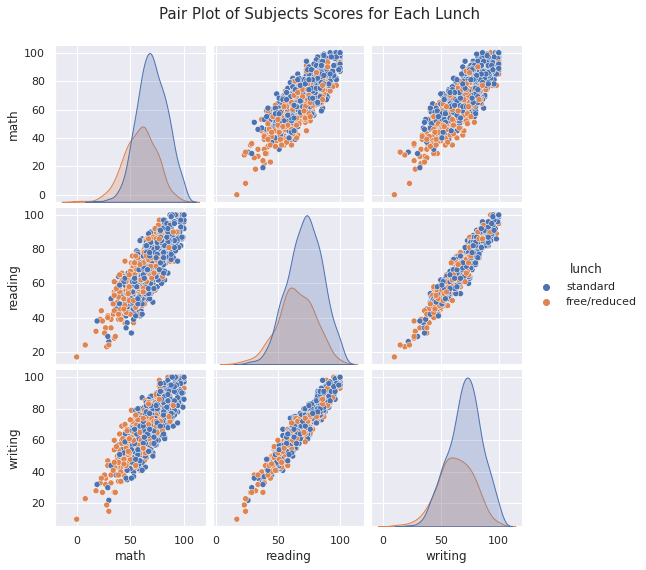

In [ ]:
Plot_pair_plot("lunch")

Students who benefitted from free/reduced lunch have a mode score lower than those with standard lunch

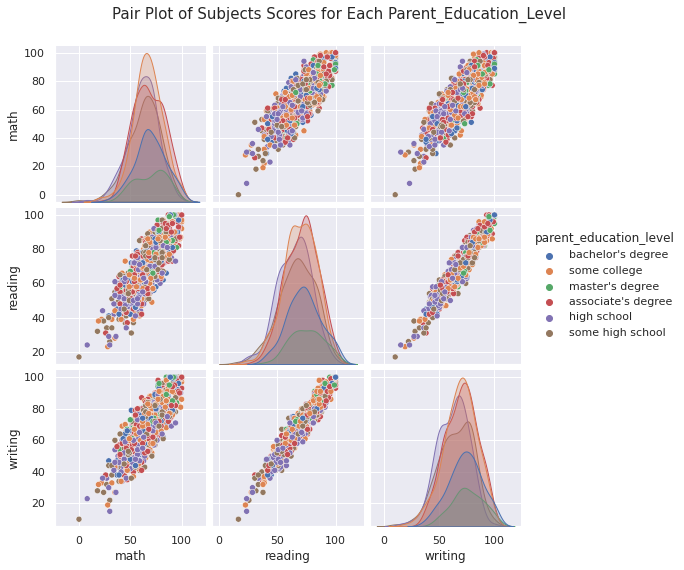

In [ ]:
Plot_pair_plot("parent_education_level")

The parents level of education will be further explored using the box plot or other grouping method

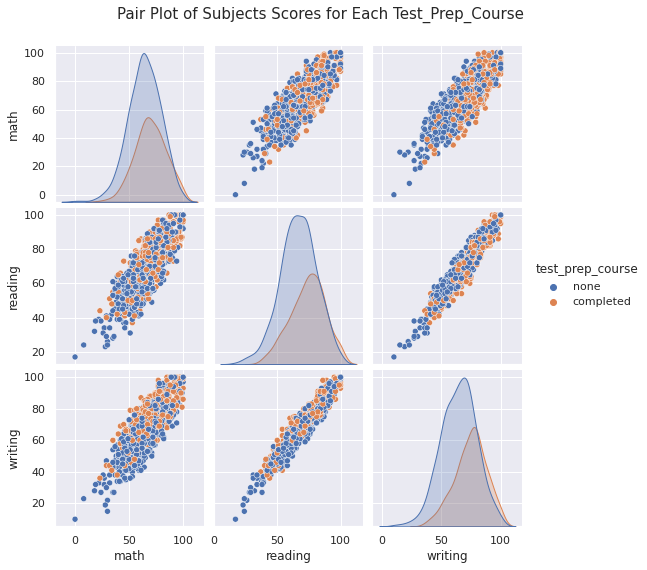

In [ ]:
Plot_pair_plot("test_prep_course")

The mode of reading and writing shifts towards the highest score, but its not so in math.

In [ ]:
# a function to plot boxplot from plotly express
def plot_box_plot(col):
    for i in df.columns[-3:]:
       
        fig= px.box(data_frame=df, y=i, color=col, title=f'Distribution of grades in {i} categorized by {col.title()}')
        fig.show()
 

In [ ]:
plot_box_plot("gender")

For the females, the distribution  goes down for math and up for reading and writing, while the distribution goes up for math aand down for reading and writing for the males. However, there are females with minmum score of zero in math

In [ ]:
plot_box_plot("race/ethnicity")

__Math__

Group E showed the best perfomance in terms of Q1,median,Q3

Group A showed the lowest in terms Q1,median,Q3

__Reading__

Group E performed the best in terms of the Q1,median,Q3 

Group A performed the lowest in in terms of Q1,median,Q3

None in Group B got a 100 

__Writing__

Group D and Group E performed the best in terms of the Q1,median,Q3
Group A performed the lowest in in terms of Q1,median,Q3

In [ ]:
var = df.groupby("race/ethnicity").describe()["writing"]
var

,count,mean,std,min,25%,50%,75%,max
race/ethnicity,,,,,,,,
group A,89.0,62.674157,15.468278,19.0,51.00,62.0,73.00,97.0
group B,190.0,65.600000,15.625173,15.0,55.25,67.0,78.00,96.0
group C,319.0,67.827586,14.983378,10.0,57.00,68.0,79.00,100.0
group D,262.0,70.145038,14.367707,32.0,61.00,72.0,80.00,100.0
group E,140.0,71.407143,15.113906,22.0,62.00,72.0,80.25,100.0


In [ ]:
# plt.scatter(x=var["count"].values,y=var['50%'].values)

In [ ]:
plot_box_plot("lunch")


Standard lunch students group showed the best perfomance in terms of Q1,median,Q3 for math, reading, and writing.

For math, the least score of 0 was at the group of free/reduced lunch and no student got full mark in math.

In [ ]:
plot_box_plot("parent_education_level")

__Math__

Group whose parents education level was associate degree showed the highest median, master's degree group never scored full mark

Group A showed the lowest in terms Q1,median,Q3

__Reading__

Group whose parents education level was master's degree had the best performance in terms of Q1, median and Q3

Group whose parents education level was high school had the lowest performance in terms of Q1, median, and Q3. The lowest grade was in the group of some high school

__Writing__

Group whose parents education level was master's degree had the best performance in terms of Q1, median and Q3

Group whose parents education level was high school had the lowest performance in terms of Q1, median, and Q3. The lowest grade was in the group of some high school

In [ ]:
plot_box_plot("test_prep_course")

For the three subjects, the group that completed the test preparation course showed better performance that the group that had none.



## Analysis Final Report

We anwered the 4 questions from the DataCamp and investigated an extra compound question. The questions with their analysis are shown first. A summary of the results is in the summary section.

## What are the average reading scores for students with/without the test preparation course?

In [ ]:
avg1 =df.groupby(['test_prep_course']).mean()["reading"]
avg1.to_frame()

,reading
test_prep_course,
completed,73.893855
none,66.534268


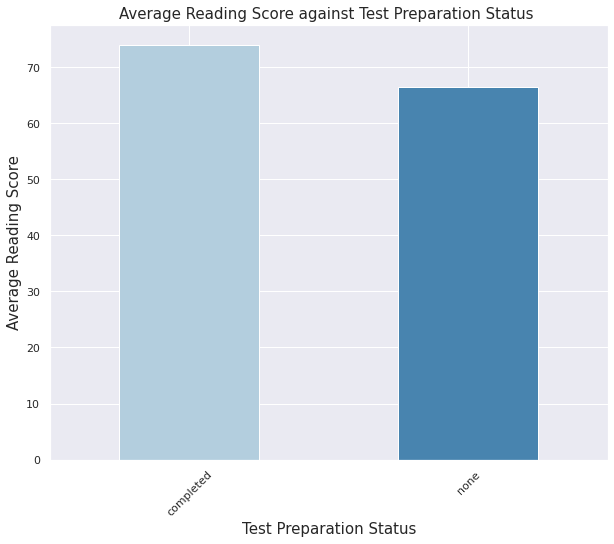

In [ ]:
avg1.plot(kind="bar", figsize =(10,8),color=['#B3CEDE','#4884AF'])
plt.title("Average Reading Score against Test Preparation Status ", fontsize = 15)
plt.ylabel("Average Reading Score", fontsize = 15)
plt.xlabel("Test Preparation Status" ,fontsize =15)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
avg1 =df.groupby(['test_prep_course']).mean()["writing"]
avg1.to_frame()

,writing
test_prep_course,
completed,74.418994
none,64.504673


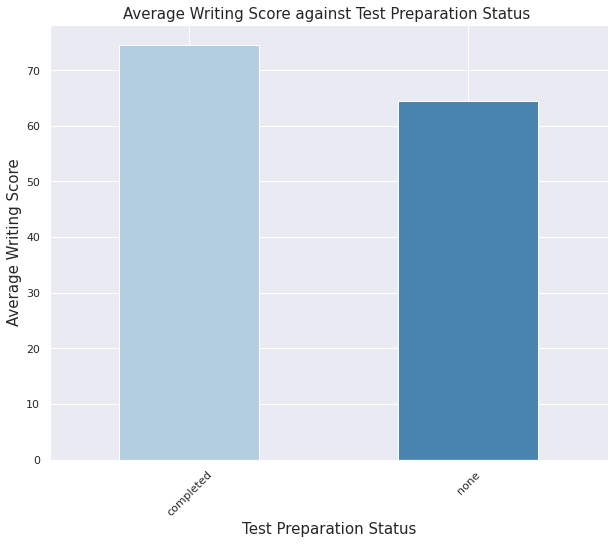

In [ ]:
avg1.plot(kind="bar", figsize =(10,8),color=['#B3CEDE','#4884AF'])
plt.title("Average Writing Score against Test Preparation Status ", fontsize = 15)
plt.ylabel("Average Writing Score", fontsize = 15)
plt.xlabel("Test Preparation Status" ,fontsize =15)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
avg1 =df.groupby(['test_prep_course']).mean()["math"]
avg1.to_frame()

,math
test_prep_course,
completed,69.695531
none,64.077882


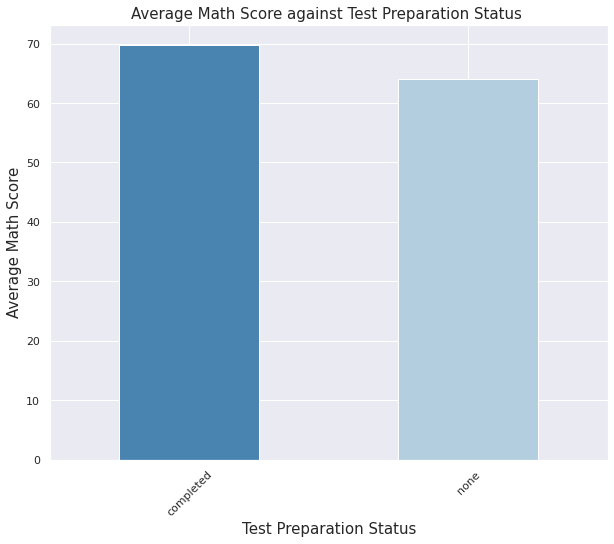

In [ ]:
avg1.plot(kind="bar", figsize =(10,8),color=['#4884AF','#B3CEDE'])
plt.title("Average Math Score against Test Preparation Status ", fontsize = 15)
plt.ylabel("Average Math Score", fontsize = 15)
plt.xlabel("Test Preparation Status" ,fontsize =15)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.groupby(['test_prep_course'])['writing',"reading",'math'].mean()

,writing,reading,math
test_prep_course,,,
completed,74.418994,73.893855,69.695531
none,64.504673,66.534268,64.077882


## What are the average scores for the different parental education levels?

In [ ]:
avg2_reading = df.groupby("parent_education_level")["reading"].mean()
avg2_reading.sort_values().to_frame()

,reading
parent_education_level,
high school,64.704082
some high school,66.938547
some college,69.460177
associate's degree,70.927928
bachelor's degree,73.000000
master's degree,75.372881


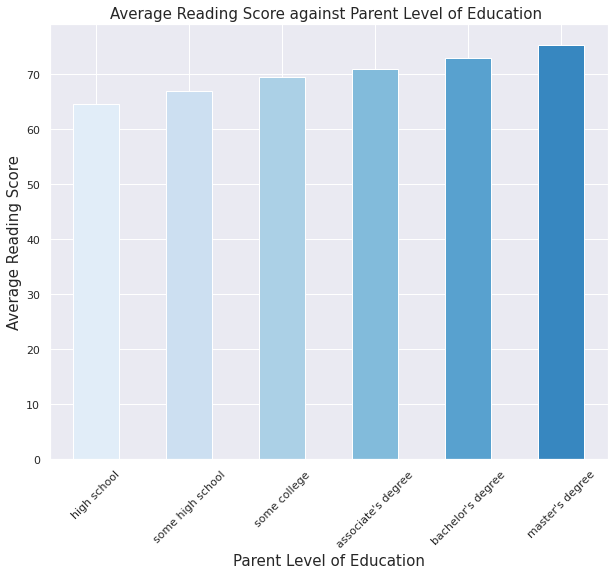

In [ ]:
avg2_reading.sort_values().plot.bar(figsize = (10,8),color=sns.color_palette('Blues',8))
plt.title("Average Reading Score against Parent Level of Education ", fontsize = 15)
plt.ylabel("Average Reading Score", fontsize = 15)
plt.xlabel("Parent Level of Education" ,fontsize =15)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
avg2_writing = df.groupby("parent_education_level")["writing"].mean()
avg2_writing.sort_values().to_frame()

,writing
parent_education_level,
high school,62.448980
some high school,64.888268
some college,68.840708
associate's degree,69.896396
bachelor's degree,73.381356
master's degree,75.677966


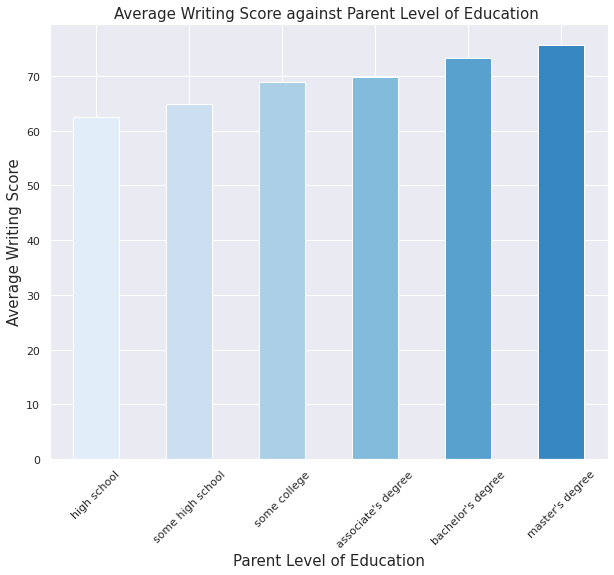

In [ ]:
avg2_writing.sort_values().plot.bar(figsize = (10,8),color=sns.color_palette('Blues',8))
plt.title("Average Writing Score against Parent Level of Education ", fontsize = 15)
plt.ylabel("Average Writing Score", fontsize = 15)
plt.xlabel("Parent Level of Education" ,fontsize =15)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
avg2_math = df.groupby("parent_education_level")["math"].mean()
avg2_math.sort_values().to_frame()

,math
parent_education_level,
high school,62.137755
some high school,63.497207
some college,67.128319
associate's degree,67.882883
bachelor's degree,69.389831
master's degree,69.745763


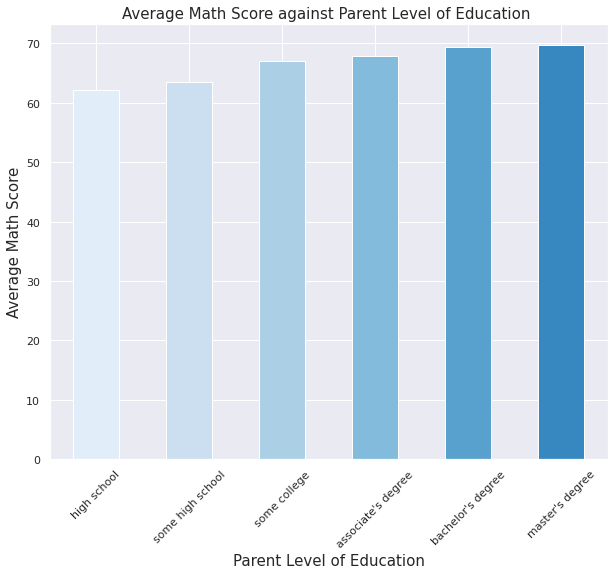

In [ ]:
avg2_math.sort_values().plot.bar(figsize = (10,8),color=sns.color_palette('Blues',8))
plt.title("Average Math Score against Parent Level of Education ", fontsize = 15)
plt.ylabel("Average Math Score", fontsize = 15)
plt.xlabel("Parent Level of Education" ,fontsize =15)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
avg2_writing = df.groupby("parent_education_level")['reading',"writing",'math'].mean()
avg2_writing

,reading,writing,math
parent_education_level,,,
associate's degree,70.927928,69.896396,67.882883
bachelor's degree,73.000000,73.381356,69.389831
high school,64.704082,62.448980,62.137755
master's degree,75.372881,75.677966,69.745763
some college,69.460177,68.840708,67.128319
some high school,66.938547,64.888268,63.497207


## Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots)

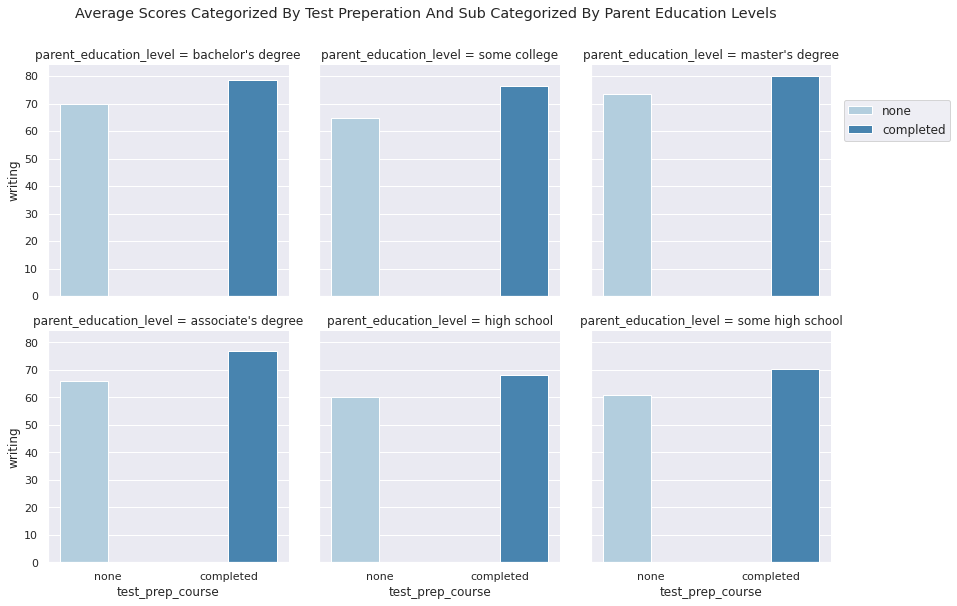

In [ ]:
bp=sns.catplot(
    data=df, x="test_prep_course", y="writing", hue="test_prep_course",sharex=True, 
  kind="bar", col="parent_education_level", col_wrap=3, aspect=1, legend_out=True,height=4,ci=None, palette=('Blues')
)

plt.legend(bbox_to_anchor=(1.05, 2), loc=2, borderaxespad=0.,prop={'size': 12})

bp.fig.suptitle('Average scores categorized by test preperation and sub categorized by parent education levels'.title(), y=1.05)


plt.show()

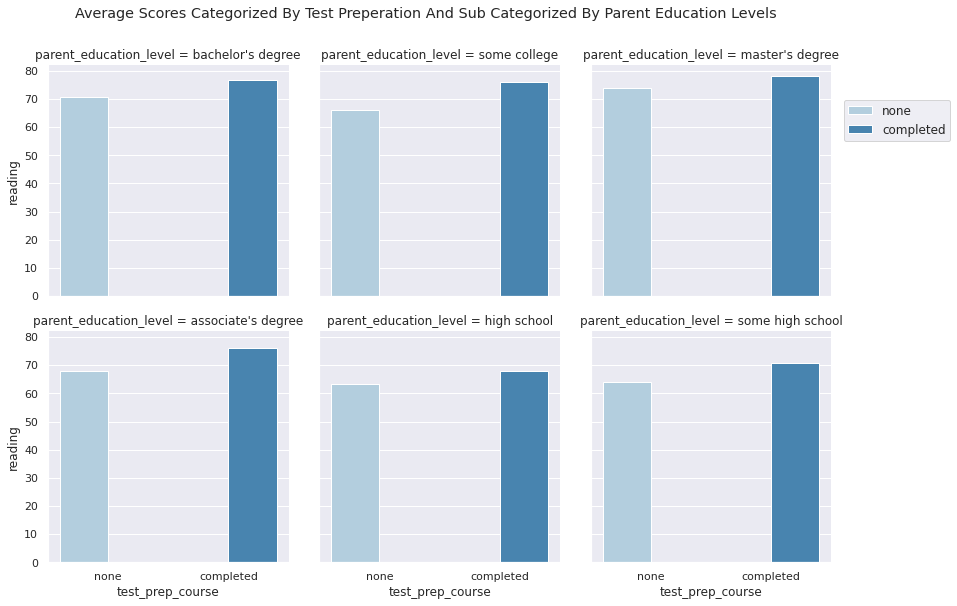

In [ ]:
bp=sns.catplot(
    data=df, x="test_prep_course", y="reading", hue="test_prep_course",sharex=True, 
  kind="bar", col="parent_education_level", col_wrap=3, aspect=1, legend_out=True,height=4,ci=None, palette=('Blues')
)

plt.legend(bbox_to_anchor=(1.05, 2), loc=2, borderaxespad=0.,prop={'size': 12})

bp.fig.suptitle('Average scores categorized by test preperation and sub categorized by parent education levels'.title(), y=1.05)
plt.show()

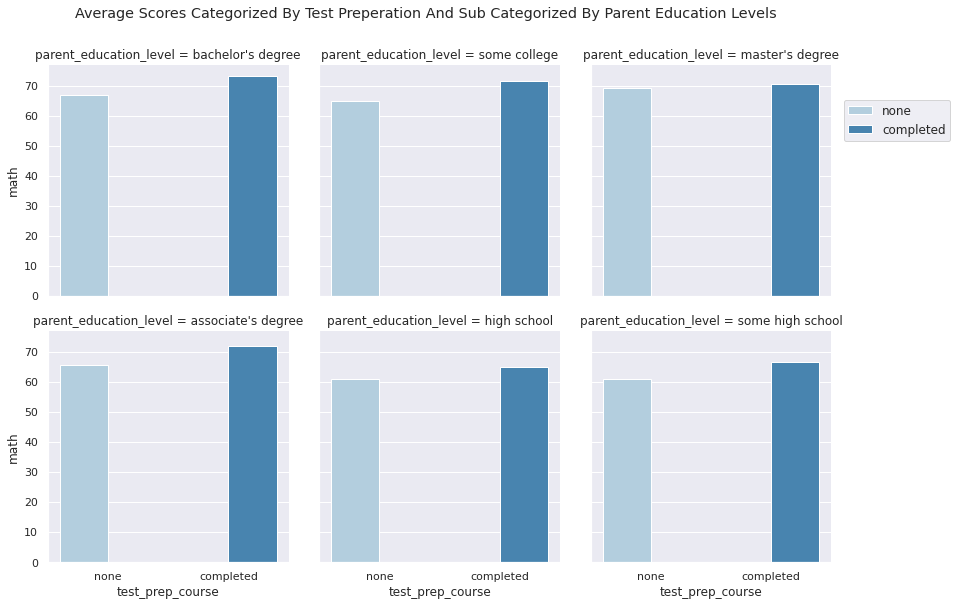

In [ ]:
bp=sns.catplot(
    data=df, x="test_prep_course", y="math", hue="test_prep_course",sharex=True, 
  kind="bar", col="parent_education_level", col_wrap=3, aspect=1, legend_out=True,height=4,ci=None, palette=('Blues')
)

plt.legend(bbox_to_anchor=(1.05, 2), loc=2, borderaxespad=0.,prop={'size': 12})

bp.fig.suptitle('Average scores categorized by test preperation and sub categorized by parent education levels'.title(), y=1.05)
plt.show()

In [ ]:
mean_ = df.groupby(['parent_education_level','test_prep_course'])['writing','reading','math'].mean()
mean_['overallavg'] = (mean_['writing']+ mean_['reading']+mean_['math']) /3
mean_

writing    reading       math  \
parent_education_level test_prep_course                                    
associate's degree     completed         76.817073  76.170732  71.829268   
                       none              65.842857  67.857143  65.571429   
bachelor's degree      completed         78.695652  76.739130  73.282609   
                       none              69.986111  70.611111  66.902778   
high school            completed         68.053571  67.839286  65.000000   
                       none              60.207143  63.450000  60.992857   
master's degree        completed         80.100000  78.250000  70.600000   
                       none              73.410256  73.897436  69.307692   
some college           completed         76.519481  75.987013  71.454545   
                       none              64.872483  66.087248  64.892617   
some high school       completed         70.363636  70.948052  66.701299   
                       none              60.754902  63.911765  61.078431   

                                         overallavg  
parent_education_level test_prep_course              
associate's degree     completed          74.939024  
                       none               66.423810  
bachelor's degree      completed          76.239130  
                       none               69.166667  
high school            completed          66.964286  
                       none               61.550000  
master's degree        completed          76.316667  
                       none               72.205128  
some college           completed          74.653680  
                       none               65.284116  
some high school       completed          69.337662  
                       none               61.915033

## The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

In [ ]:
# Create a correlation table with pandas
df_corr = df.corr(method='pearson')

# Set up the correlation plot
fig = go.Figure(go.Heatmap(
  		# Set the appropriate x, y and z values
        z=df_corr.values.tolist(),
        x=df_corr.columns,
        y=df_corr.columns,
  		# Set the color scale,
        colorscale='blues', 
  		# Set min and max values
        zmin=0, zmax=1),
        layout=go.Layout(
        title="Correlation between Scores",autosize =True,
        xaxis=dict(title ='Subjects'),
        yaxis= dict(title ="Subjects")),)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
   
)

# Show the plot
fig.show()

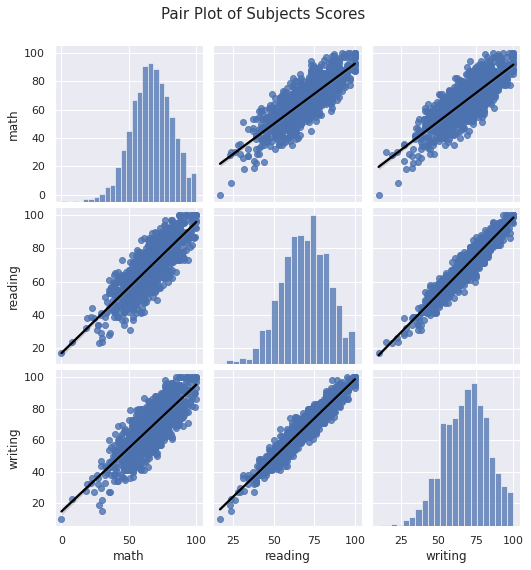

In [ ]:
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'black'}})
g.fig.suptitle(f'Pair Plot of Subjects Scores ',fontsize=15, y=1.05)
plt.show()

## Factors affecting top performing students

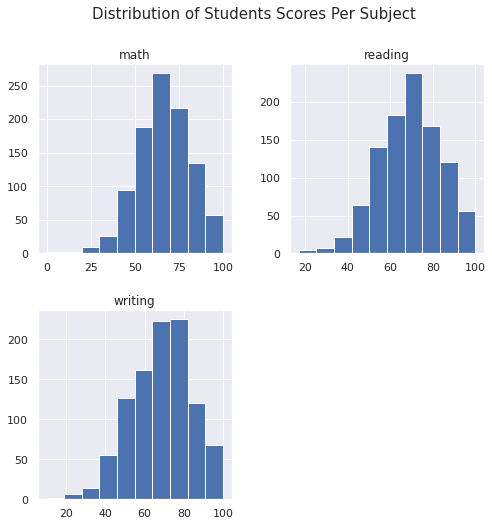

In [ ]:
df.hist(figsize=(8,8))
plt.ylabel("Scores", fontsize=15)
plt.suptitle("Distribution of Students Scores Per Subject", fontsize=15)

plt.show()


Neglecting the 1.8% of the students whose scores are less than 40 in all subjects and considering two categories of students that we will assume top performing and lowest perfroming groups. For this analysis we assumed that:

__Top performing__ are those who achieve greater than or equal to 90 for all three subjects

__Lowest performing__ are those who achieve less than or equal 60 and greater than or equal to 4 for all three subjects


In [ ]:
top_performing=df[(df['writing']>=80) & (df['reading']>=80) & (df['math']>=80)]
top_performing.head()
top_performing.shape

(121, 8)

In [ ]:
lowest_performing=df[((df['writing']>=40) & (df['writing']<=60)) & ((df['reading']>=40) & (df['reading']<=60) ) & ((df['math']>=40) &(df['math']<=60))]
lowest_performing.shape

(157, 8)


Top performing students form 12% and lowest performing form 16% of the whole data set.

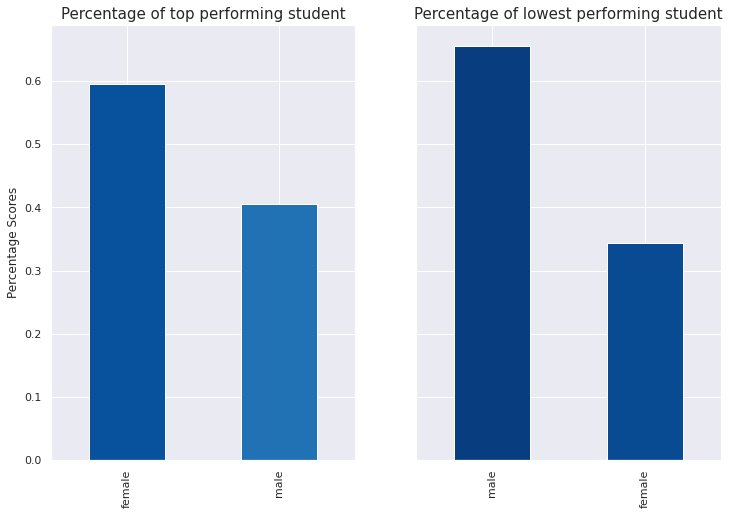

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,8),sharey=True) # how to fix the x axis

tp =top_performing['gender'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[0] )
ax[0].set_title("Percentage of top performing student",fontsize = 15)
lp =lowest_performing['gender'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',18),ax=ax[1] )
ax[1].set_title("Percentage of lowest performing student",fontsize = 15)
tp.set_ylabel("Percentage Scores")

plt.show()


For the top performing students: 60% are females 40% are males

For the lowest performing students: 35% are females 65% are males

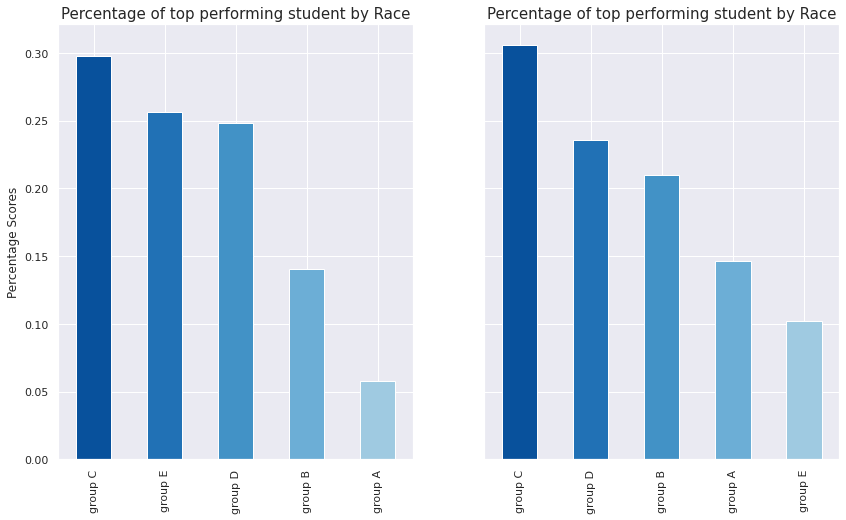

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,8),sharey=True)

tp_=top_performing['race/ethnicity'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[0] )
ax[0].set_title("Percentage of top performing student by Race",fontsize = 15)
lowest_performing['race/ethnicity'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[1] )
ax[1].set_title("Percentage of top performing student by Race",fontsize = 15)
tp_.set_ylabel("Percentage Scores")
plt.show()


For lowest performing studetns:

Group C forms 30%
Group E forms 10%


For top performing students:

Group C also forms 30%
Group E forms 25%

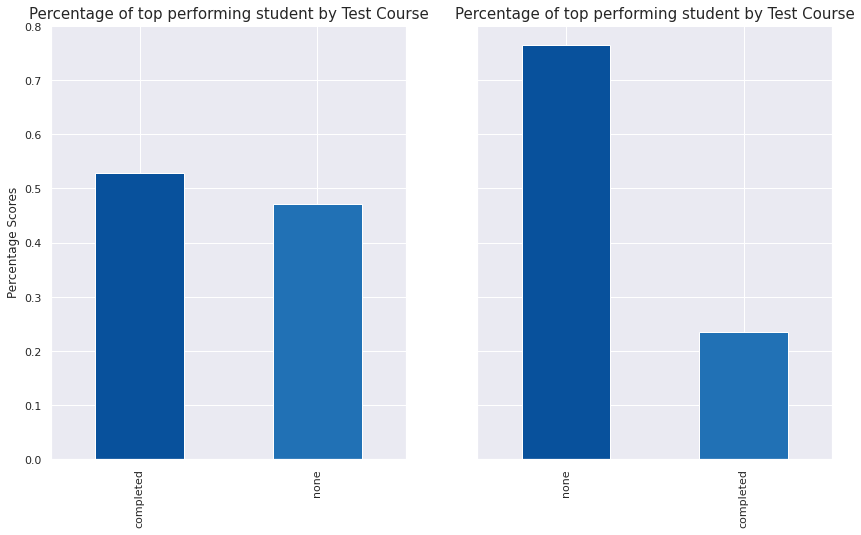

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,8),sharey=True)

tp__ =top_performing['test_prep_course'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[0] )
ax[0].set_title("Percentage of top performing student by Test Course",fontsize = 15)
lowest_performing['test_prep_course'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[1] )
ax[1].set_title("Percentage of top performing student by Test Course",fontsize = 15)
tp__.set_ylabel("Percentage Scores")

plt.show()

__For lowest performing studetns__:

Students who completed their test preperation course were 23%

Students who did not complete their test preperatoin course were 77%


__For top performing students__:

Students who completed their test preperation course were 53%

Students who did not complete their test preperatoin course were 47%

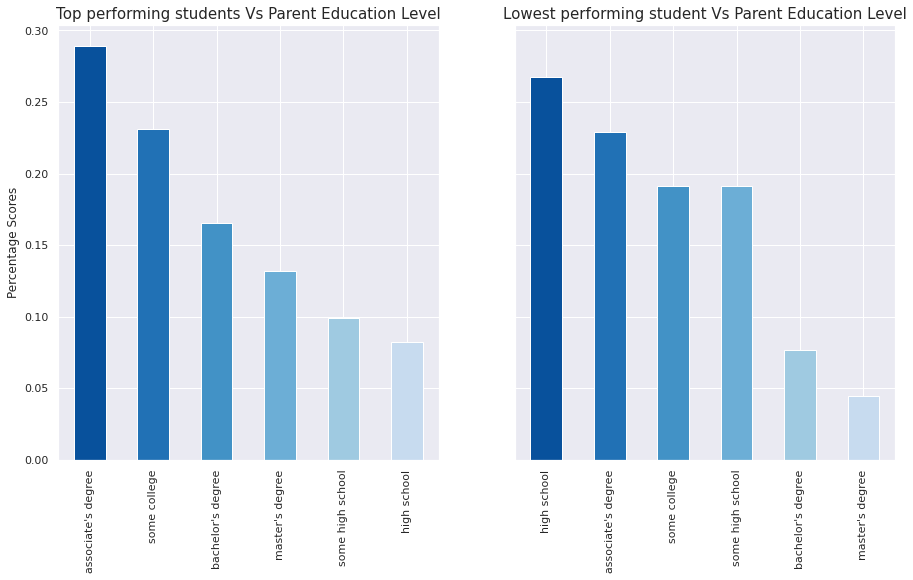

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,8),sharey=True) 

tp2 =top_performing['parent_education_level'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[0] )
ax[0].set_title("Top performing students Vs Parent Education Level",fontsize = 15)
lowest_performing['parent_education_level'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[1] )
ax[1].set_title("Lowest performing student Vs Parent Education Level",fontsize = 15)
tp2.set_ylabel("Percentage Scores")

plt.show()

__For top performing students__:

Students whose parents had associate's degree form 29%

Students whose paretns had some collage form 23%

Studetns whose parents either had some high school or finished high school form about 18% collectively 

__For lowest performing studetns__:

Students whose parents had associate's degree form 29%

Students whose paretns had some collage form 23%

Studetns whose parents either had some high school or finished high school form about 18% collectively 




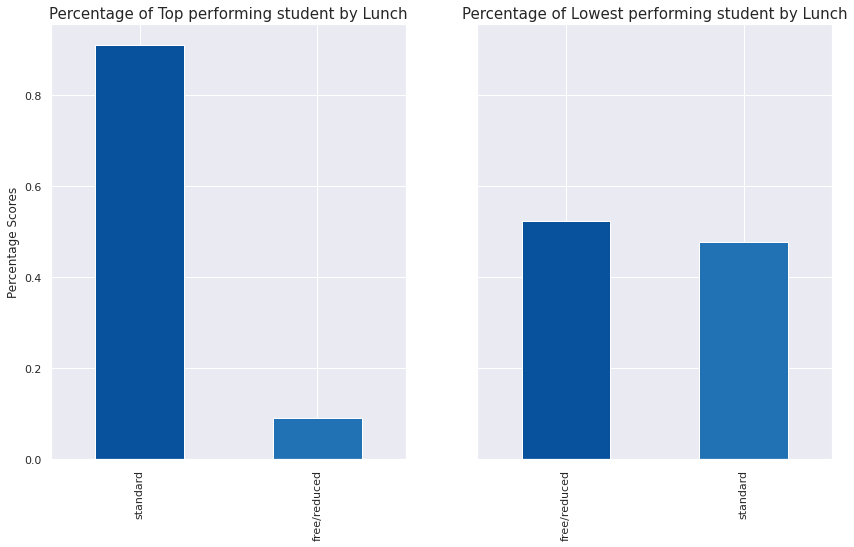

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(14,8),sharey=True)

tp3 =top_performing['lunch'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[0] )
ax[0].set_title("Percentage of Top performing student by Lunch",fontsize = 15)
lowest_performing['lunch'].value_counts(normalize=True).plot(kind='bar',color=sns.color_palette('Blues_r',7),ax=ax[1] )
ax[1].set_title("Percentage of Lowest performing student by Lunch",fontsize = 15)
tp3.set_ylabel("Percentage Scores")

plt.show()

In [ ]:
lowest_performing['lunch'].value_counts(normalize=True)

free/reduced    0.522293
standard        0.477707
Name: lunch, dtype: float64

__For top performing students__:

Students whose lunch plan was standard form 90%

Students whose lunch plan was free/reduced form 10%

__For lowest performing studetns__:

Students whose lunch plan was standard form 48%

Students whose lunch plan was free/reduced form 52% 




In [ ]:
top_performing[(top_performing['writing']>90)].shape[0]/top_performing.shape[0]

0.47107438016528924

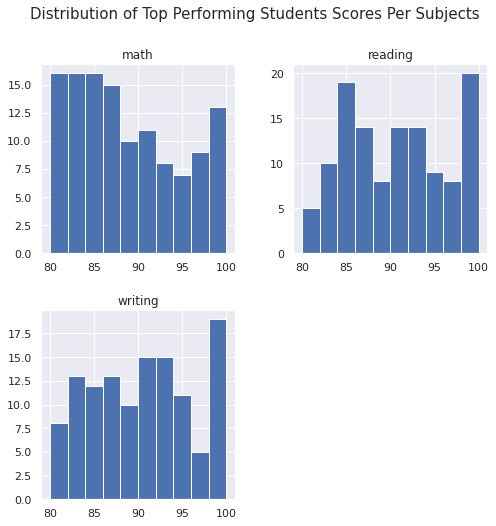

In [ ]:
top_performing.hist(figsize=(8,8))
plt.suptitle("Distribution of Top Performing Students Scores Per Subjects ", fontsize=15)
plt.show()

__For Math__
52% of the top performing students scored lower than 90

48% of the top performing studetns scored higher than 90

11% of the top performing students scored 100

__For Reading__
45% of the top performing students scored lower than 90

55% of the top performing studetns scored higher than 90

17% of the top performing students scored 100

__For Writing__
46% of the top performing students scored lower than 90

54% of the top performing studetns scored higher than 90

15% of the top performing students scored 100

In [ ]:
top_performing.median().to_frame()

,0
math,87.0
reading,90.0
writing,90.0


In [ ]:
lowest_performing[(lowest_performing['writing']>40) & (lowest_performing['writing']<50)].shape[0]/lowest_performing.shape[0]

0.3821656050955414

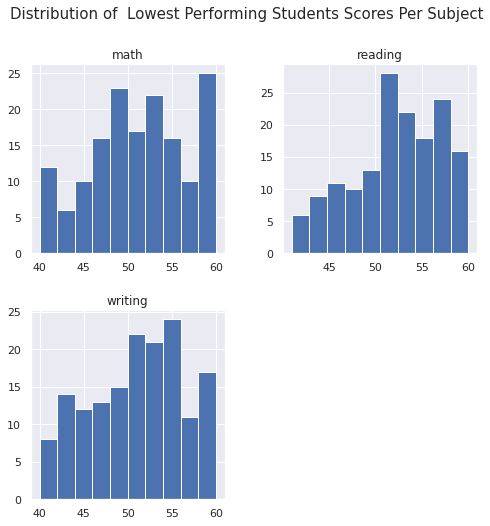

In [ ]:
lowest_performing.hist(figsize=(8,8))
plt.suptitle("Distribution of  Lowest Performing Students Scores Per Subject", fontsize=15)
plt.show()

__For Math__
62% of the lowest performing students scored between 40 and 50

38% of the lowest performing studetns scored between 50 and 60

12% of the lowest performing students scored 40

__For Reading__
6% of the lowest performing students scored scored between 40 and 50

45% of the lowest performing studetns scored between 50 and 60

6% of the lowest performing students scored 40

__For Writing__
42% of the lowest performing students scored scored between 40 and 50

58% of the lowest performing studetns scored between 50 and 60

8% of the lowest performing students scored 40

In [ ]:
median_df = lowest_performing.median().to_frame()
median_df.columns =['median']
median_df

,median
math,51.0
reading,53.0
writing,51.0


In [ ]:
fig= px.box(data_frame=top_performing, y='writing', color='gender', title= 'Distribution of top students grades in writing categorized by Gender') 

fig.show()

Top Performing students in writing subject, females have higher Q1,Q3 and median than males



In [ ]:
fig= px.box(data_frame=top_performing, y='writing', color='parent_education_level', title = 'Distribution of top students grades in writing categorized by Parent Education Level')
fig.show()

Top Performing students in writing subject, students whose parents have bachelor's degree had the highest Q1,Q3, and median

Those whose parents had some high school had the lowest Q1, Q3 and median 

In [ ]:
fig= px.box(data_frame=top_performing, y='writing', color='lunch', title='Distribution of top students grades in writing categorized by Lunch')
fig.show()

Top Performing students in writing subject, students whose lunch was free/reduced had the highest Q1,Q3, and median



In [ ]:
fig= px.box(data_frame=top_performing, y='writing', color='test_prep_course', title='Distribution of top students grades in writing categorized by Test Preperation Course')
fig.show()

Top Performing students in writing subject, students who completed the test preperation course had the highest Q1,Q3, and median


In [ ]:
fig= px.box(data_frame=top_performing, y='writing', color='race/ethnicity', title= 'Distribution of top students grades in writing categorized by Race')
fig.show()

Top Performing students in writing subject, students whose ethnic group was A had the highest median and Q1

Those whose whose ethnic group was D had the highest Q3


Reading

In [ ]:
fig= px.box(data_frame=top_performing, y='reading', color='gender',title ="Distribution of top students grades in reading categorized by Gender")
fig.show()

Top Performing students in reading subject, male students had the highest median and Q1 and Q3



In [ ]:
fig= px.box(data_frame=top_performing, y='reading', color='parent_education_level', title="Distribution of top students grades in reading categorized by Parent Education Level")
fig.show()

Top Performing students in reading subject, students whose parent education level was bachelor's degree had the highest median and Q1 and Q3

Those whose whose parent education level was high school had the lowest median, Q1 and Q3

In [ ]:
fig= px.box(data_frame=top_performing, y='reading', color='race/ethnicity',title ="Distribution of top students grades in reading categorized by Race")
fig.show()

Top Performing students in reading subject, students in Group A had the highest median and Q1 

Those in group E had the highest Q3

Those in group C had the lowest median and Q3

Those in group D had the lowest Q1

In [ ]:
fig= px.box(data_frame=top_performing, y='reading', color='lunch',title ="Distribution of top students grades in reading categorized by Lunch")
fig.show()

Top Performing students in reading subject, students students whose lunch group is free/standard had the highest Q1, Q3 and median


In [ ]:
fig= px.box(data_frame=top_performing, y='reading', color='test_prep_course',title ="Distribution of top students grades in reading categorized by Test Preperation Course")
fig.show()

Top Performing students in reading subject, students who completed and those who didn't complete their test preperation course had the same median and Q1

Those who took the preperation course had highest Q3


In [ ]:
fig= px.box(data_frame=top_performing, y='math', color='gender',title ="Distribution of top students grades in math categorized by Gender" )
fig.show()

Top Performing students in math subject, male students had the highest Q1, Q3 and median

In [ ]:
fig= px.box(data_frame=top_performing, y='math', color='race/ethnicity',title ="Distribution of top students grades in math categorized by Race")
fig.show()

Top Performing students in math subject, students from Group E had the highest Q1, Q3 and median

Those in Group D had the lowest Q1, Q3 and median





In [ ]:
fig= px.box(data_frame=top_performing, y='math', color='test_prep_course',title ="Distribution of top students grades in math categorized by Test Preperation Course")
fig.show()

Top Performing students in math subject, students who completed the test preperation course had the highest Q1, Q3 and median



In [ ]:
fig= px.box(data_frame=top_performing, y='math', color='lunch',title ="Distribution of top students grades in math categorized by lunch")
fig.show()

Top Performing students in math subject, students whose lunch plan was free/reduced had the same performance for Q1 and median as standard

Those whose lunch plan was standard had a higher Q3

In [ ]:
fig= px.box(data_frame=top_performing, y='math', color='parent_education_level',title ="Distribution top student by parents level of education in math")
fig.show()

Top Performing students in math subject, students parent education level was bachelor's degree had the highest Q1, Q3 and median

Those whose parent eduaction level was some high school had the lowest median and Q1 while those whose parents had high school had the lowest Q3

# Summary



1.   For the first question: we expanded the analysis to all the subjects and we conclude from the results that completing the test preperation course is correlated to test scores. Those who completed the course scored 10 points higher in average for reading, 7 points higher for writing and the least affected subject was math with only 5 points difference between the average scores.
2.   For the second question: we concluded from the results that students whose parents had a master's degree had the highest average score in all 3 subjects, closely followed by those whose paernts had a bachelor's degree for all 3 subjects. 

    Students whose parents had high school or some high school scored the lowest average in all 3 subjects
3. For the third question we compared the average scores for all 3 subjects in terms of the interaction between parent education level and test preperation scores We concluded that:
* Those whose parents have master's degree had the lowest difference in average score of 1 point higher for those who completed the test preperation courses in __math__.
* Those whose parents have some college and some high school showed a difference of 10 points higher for those who completed the test preperation course for __reading__.
* Those whose parents havesome college and those who have associate's degree showed the largest difference of 10 points higher for those who took the prep course to those who didnot. 

We conclude that test prep courses were most effective for Reading and Writing and had the least impact for Math.

4. For the fourth question, we concluded that there is a strong correlation between  all subjects with writing and reading having the strongest correlation of **__95%__**  . This is an indication that students who perform well in one subject are also likely score will in the others.

5. Further analysis on the top performing students shows that:

*  Females perfomed well in reading and writing more than their male counterparts, while the males performed well in mathematics than the female counterparts. 

* For the top performing students: 60% are females 40% are males

* We also conclude that majority of the top student belong to the ethnic group C (30%) and E (25%), although E is the second minor ethnic group

* For top performing students parent education level was not a strong factor in the scores unlike the averages showed in point 3.

* For preperation courses only 53% completed the test preperation courses 

* For lunch only 48% had the standard plan.













# Recommendation for Further Analysis

We recommend to do a further analysis for the test scores of the lowest performing students. 

We recommend Hypothesis testing to confirm our suggested correlations between categroical data and test scores.